In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load and explore the dataset
dataset = pd.read_csv('Cancer_Data.csv')  # Replace 'path_to_cancer.csv' with the actual path to your dataset file
print(dataset.head())
print(dataset.shape)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [3]:
# Step 2: Preprocess the dataset
dataset = dataset.drop(['id', 'Unnamed: 32'], axis=1)
# Additional preprocessing steps, if required

In [4]:
# Step 3: Split the dataset into training and test sets
X = dataset.drop('diagnosis', axis=1)
y = dataset['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Step 4: Implement and train the k-NN classifier
k = 5  # Define the number of neighbors (k)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:
# Step 5: Evaluate the classifier
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')  # Specify pos_label as 'M' for malignant

In [7]:
print('Accuracy:', accuracy)
print('Precision:', precision)

Accuracy: 0.956140350877193
Precision: 1.0


In [8]:
# Step 6: Visualize the data
# Select the columns to visualize
columns_to_plot = ['radius_mean', 'texture_mean']  # Replace with the names of the features you want to visualize

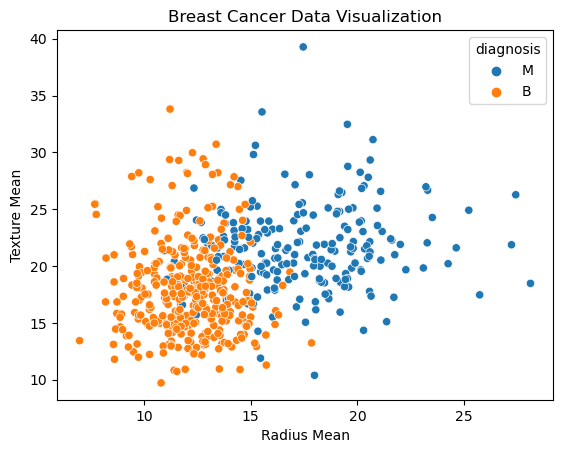

In [9]:
# Create a scatter plot
sns.scatterplot(data=dataset, x='radius_mean', y='texture_mean', hue='diagnosis')  # Adjust the column names as per your dataset
# Add labels and title to the plot
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Breast Cancer Data Visualization')
# Display the plot
plt.show()

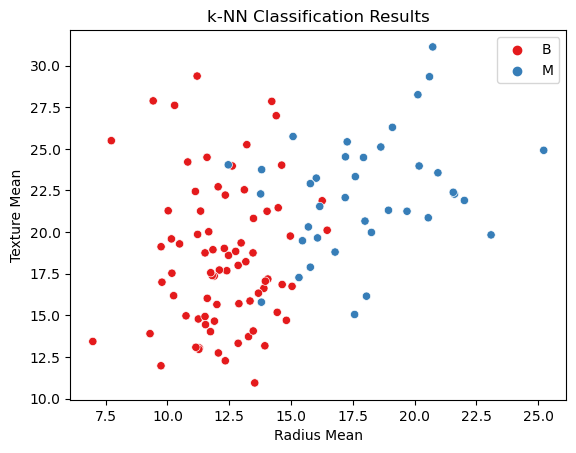

In [10]:
# Step 4: Create a scatter plot to visualize the classification results
sns.scatterplot(data=X_test, x='radius_mean', y='texture_mean', hue=y_pred, palette='Set1')

# Add labels and title to the plot
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('k-NN Classification Results')

# Display the plot
plt.show()